In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\ASUS\\Downloads\kerala.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


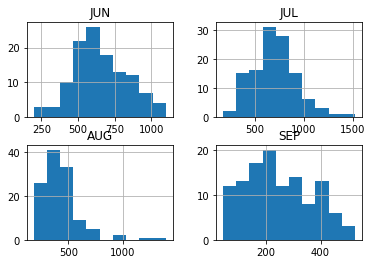

In [4]:
c=df[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [5]:
df["FLOODS"]=df["FLOODS"].map({"YES":1,"NO":0})

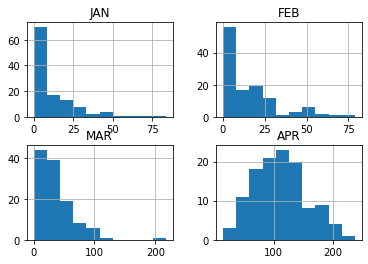

In [6]:
c=df[['JAN','FEB','MAR','APR']]
c.hist()
plt.show()

In [7]:
# Changing the target column to numeric values
df["FLOODS"] = df["FLOODS"].map({"YES": 1, "NO": 0})

In [8]:
df["JUN_GT_500"] = (df["JUN"] > 500).astype("int")
df["JUL_GT_500"] = (df["JUL"] > 500).astype("int")
df_small = df.loc[:, ["YEAR", "JUN_GT_500", "JUL_GT_500", "FLOODS"]]
df_small["COUNT"] = 1
df_small.head()

,YEAR,JUN_GT_500,JUL_GT_500,FLOODS,COUNT
0,1901,1,1,NaN,1
1,1902,0,1,NaN,1
2,1903,1,1,NaN,1
3,1904,1,1,NaN,1
4,1905,1,1,NaN,1


In [9]:
df_small.shape

(118, 5)

In [10]:
# Creating the tabular data based on the counts
pd.crosstab(df_small["FLOODS"], df_small["JUN_GT_500"])

""


In [11]:
# Creating the tabular data based on the counts
pd.crosstab(df_small["FLOODS"], df_small["JUN_GT_500"])

""


In [12]:
P_F = (6 + 54) / (6 + 54 + 19 + 39)
P_J = (39 + 54) / (6 + 54 + 19 + 39)
P_F_intersect_J = 54 / (6 + 54 + 19 + 39)
print(f"P(F): {P_F}") 
print(f"P(J): {P_J}")
print(f"P(F AND J): {P_F_intersect_J}")

P(F): 0.5084745762711864
P(J): 0.788135593220339
P(F AND J): 0.4576271186440678


In [13]:
# Now calculate probailitity of flood given it rained more than 500 mm in June (P(A|B))
P_F_J = P_F_intersect_J / P_J
print(f"P(F|J): {P_F_J}")

P(F|J): 0.5806451612903226


In [14]:
# Probability of rain more than 500 mm in June given it flooded that year (P(B|A))
P_J_F = (P_F_J * P_J) / P_F
print(f"P(J|F): {P_J_F}")

P(J|F): 0.9000000000000001


In [15]:
# We can similarly do it for july
pd.crosstab(df_small["FLOODS"], df_small["JUL_GT_500"])


""


In [16]:
P_F = (3 + 57) / (3 + 57 + 19 + 39)
P_J = (39 + 57) / (3 + 57 + 19 + 39)
P_F_intersect_J = 57 / (3 + 57 + 19 + 39)
print(f"P(F): {P_F}") 
print(f"P(J): {P_J}")
print(f"P(F AND J): {P_F_intersect_J}")

P(F): 0.5084745762711864
P(J): 0.8135593220338984
P(F AND J): 0.4830508474576271


In [17]:
# Now calculate probailitity of flood given it rained more than 500 mm in July
P_F_J = P_F_intersect_J / P_J
print(f"P(F|J): {P_F_J}")

P(F|J): 0.59375


In [18]:
# Probability of rain more than 500 mm in July given it flooded that year (P(B|A))
P_J_F = (P_F_J * P_J) / P_F
print(f"P(J|F): {P_J_F}")

P(J|F): 0.9500000000000002


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

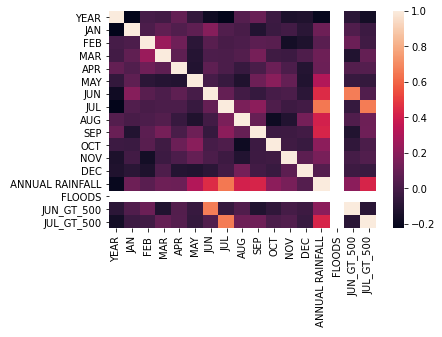

In [20]:
sns.heatmap(df.corr())